# COGS 108 - Final Project 

# Overview

The release of the new Parks Master Plan by the San Diego Parks and Recreation department devaluaing acerage has been met with major media backlash, citing the importance of acerage in parks planning. This project attempted to evaluate the relationship between acerage and Yelp rating and sentiment. The main hypothesis of my project was that that public sentiment reflected media backlash, and that higher acerage would correspond with higher Yelp reviews. However, after conducting analysis, I found that there was no significant relationship between the acerage of a park and it's corresponding sentiment and star rating on Yelp.

# Name & GitHub ID

- Name: Kaylie Crow
- GitHub Username: kayliecrow

# Research Question

What is the relationship between the overall sentiment and rating of Yelp reviews and the acreage of Parks in the San Diego region? Does this have possible long term implications for metric parks planning for the San Diego Parks and Recreation department?

## Background and Prior Work

Across the country, different Parks and Recreation departments use judgement metrics to decide future planning of park areas. The Parks and Recreation department of San Diego has recently implemented a new judgement metric. Instead of the previous ratio of acreage and population data, there will be an activity focused points based value system in place(1). For example, the system will assign 2 points for "Food Area/Concessions" and 8 points for being close to a major bus stop(1)(2). If a park has enough points for a certain population, no new parks will be deemed necessary, regardless of the park's acreage(1).

This plan has been met with mounting tension among locals. The Community Planners Committee of San Diego, or the CPC, released a statement to the media, entitled "Community Planners Committee Rejects 'Complete Communities' Plan; needs more affordable housing, more park land". The CPC highlights the new plan's failure to take into account acreage as a meaningful judgement metric in the new proposed plan, or to give it any meaningful points value(3). While tensions remain high in San Diego over this new parks plan, there has been greater backlash at the city's failure to take time for a full public review(3). 

Yelp provides a space for users of local San Diego parks to rate their experiences, on a scale of 1 star to 5 stars(4). Users are also asked to leave written reviews about their experience. These written statements contain the sentiment of each person's experience in the parks. These reviews hold important public feedback on the city parks.

The possible effect of park size on the frequency of physical activity within a park has been studied in an article published in the American Journal of Public Health. In this research article by Andrew T. Kaczynski, Luke R. Potwarka, and Brian E. Saelens, the researchers conducted a study on participants' usage of each park for physical activity, judged against the park's size, distance, and features. The article concluded that size of a park was not a significant predictor to how frequently it was used for physical activity(5). While this article focuses on people's frequent use of parks not being attributed to the parks size, and provides valuable insight into how parks size affects use, this article fails to take into account whether or not users actually enjoyed each park. This project will focus closely on people's sentiment of each park, and how this relates to the size of the parks to fill in the missing gaps of this research article. 

This project will focus on how the acreage size of parks within the San Diego region affects public sentiment of these parks as seen through Yelp reviews. This project will also explore what these findings mean for acreage consideration in the San Diego Parks and Recreation departments new judgement metric, and their subsequent future planning within the next 5 years.


References (include links):
- 1)https://www.sandiego.gov/sites/default/files/draft_parks_master_plan_screen_quality.pdf
- 2)https://www.sandiegoreader.com/news/2020/jul/20/stringers-san-diego-city-point-system-produce/
- 3)https://hn1m.org/blog/cpc-press-release-complete-communities/
- 4)https://www.yelp-press.com/company/fast-facts/default.aspx
- 5)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2446450/

# Hypothesis


I hypothesize that as a parks acreage increases, it's positive sentiment and star rating on Yelp will increase as well. Local media usually reflects the thoughts of the people. Thus, I believe that the large media backlash against the new judgement metric the San Diego Parks and Recreation department released suggests that the general public probably reflects this sentiment of the importance of acreage. I believe if the regular public's opinion reflects the media backlash against the decreased importance of acreage in planning parks, the San Diego Parks and Recreation department will have to reevaluate their current plan for the future to weigh acreage more heavily.

# Dataset(s)

These datasets were provided by the Professor, so I have omitted the links.

- Dataset Name: San Diego Parks Yelp Data, Reviews
- Number of observations: 2332

This dataset includes information on the text of the Yelp reviews of different parks in the San Diego region, and their corresponding star rating. In this dataset, I used all of the columns. 

- Dataset Name: Park Locations Data
- Number of observations: 2768

This dataset includes information about the parks themselves, the locations, and the acreage of each park. In this dataset, I plan to use the alias, and the gis_acres column. The gis_acres column contains the acreage amount of the park.

I plan to combine the datasets together on their corresponding name columns. This column in the Yelp Reviews dataset is named “id”, and in the Park Locations Dataset named “alias”. By combining on this column, I will ensure that there is data in both datasets for each park.

# Setup

In [37]:
#code imports
import pandas as pd
import sys
import geopandas as gpd
import numpy as np

#visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import patsy
import statsmodels.api as sm

In [38]:
#reading data in
review_url = 'https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/yelp_SD_reviews.csv'
review_df = pd.read_csv(review_url)
acreage_url = 'https://raw.githubusercontent.com/COGS108/individual_fa20/master/data/parks_datasd.geojson'
acreage_df = gpd.read_file(acreage_url, ignore_geometry=True)

# Data Cleaning

In [39]:
#dropping unnessecary columns
acreage_df = acreage_df[['alias', 'gis_acres']]
#renaming columns for readability/standardization
acreage_df = acreage_df.rename(columns = {'gis_acres' : 'acres', 'alias': 'id'})
review_df = review_df.rename(columns = {'text':'review'})
#combining datasets on the 'id' column, omitting any not matching, or lacking the 'id' column 
df = pd.merge(review_df, acreage_df, on = 'id')

In [40]:
#creating column with binary/pos neg (for this, i considered a rating of 3 to be positive for simplicity)
def convert_rating(rating):
    if rating >= 3.0:
        return 'pos'
    elif rating < 3.0:
        return 'neg'
df['binary rating'] = df['rating'].apply(convert_rating)

In [41]:
df

,id,rating,review,acres,binary rating
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1089.476460,pos
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1089.476460,pos
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1089.476460,pos
3,Waterfront Park,5,"After eating brunch in Little Italy, we decide...",12.693865,pos
4,Waterfront Park,5,Definitely worth the price of admission.\n\nIf...,12.693865,pos
...,...,...,...,...,...
535,Ashley Falls Park,5,New playground for my 4 yo and 10month old. Bu...,11.660442,pos
536,Ashley Falls Park,4,came here for a kids birthday party...not my f...,11.660442,pos
537,Cuvier Park,5,Cuvier Park also known as The Wedding Bowl. Th...,0.610523,pos
538,Cuvier Park,5,I cannot think of an ugly beach in La Jolla or...,0.610523,pos


# Data Analysis & Results

To begin, I will perform exploratory data analysis on my data

Text(0.5, 1.0, 'General Sentiment of Parks within the San Diego Region')

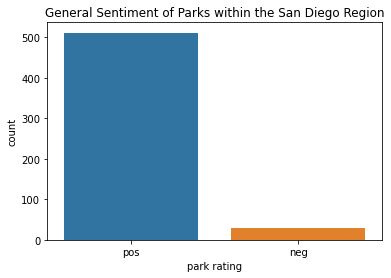

In [42]:
#general sentiment of parks 
sns.countplot(x = 'binary rating', data = df)
plt.xlabel('park rating')
plt.title('General Sentiment of Parks within the San Diego Region')

From this graph, it seems that there are scarcely any negative reviews (reviews under 3 stars) for parks generally in the San Diego region. This seems to show a skewed distribution. This may prove to be a limitation of the data. The next graph will look at the actual star rating distribution to confirm if the star ratings are skewed or not.

Text(0.5, 1.0, 'Frequency Distribution of Star Rating')

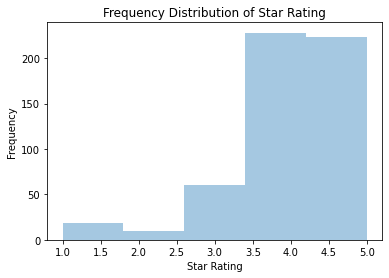

In [43]:
#histogram of star rating distribution
sns.distplot(df['rating'], kde = False, bins = 5)
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Star Rating')

The graph above is a historgram showing the frequency distribution of star rating in the data frame. This graph suggests the distribution of star ratings is skewed. This may prove to be a limitation in analysis. The next graph will look at the acreage distribution.

Text(0.5, 1.0, 'Frequency Distribution of Acreage')

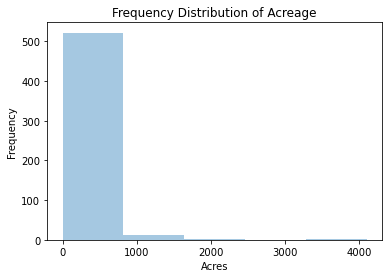

In [44]:
#histrogram of acreage distribution
sns.distplot(df['acres'], kde = False, bins = 5)
plt.xlabel('Acres')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Acreage')

This histogram above suggests that most of the parks are ~750 acres or under. This seems to show a skewed distribution. This may be another limitation of the dataset. However, I will analyze the relationship between star ratings graphed against acres to visualize if there is a relationship.

Text(0.5, 1.0, 'Relationship between Acreage and Star Rating')

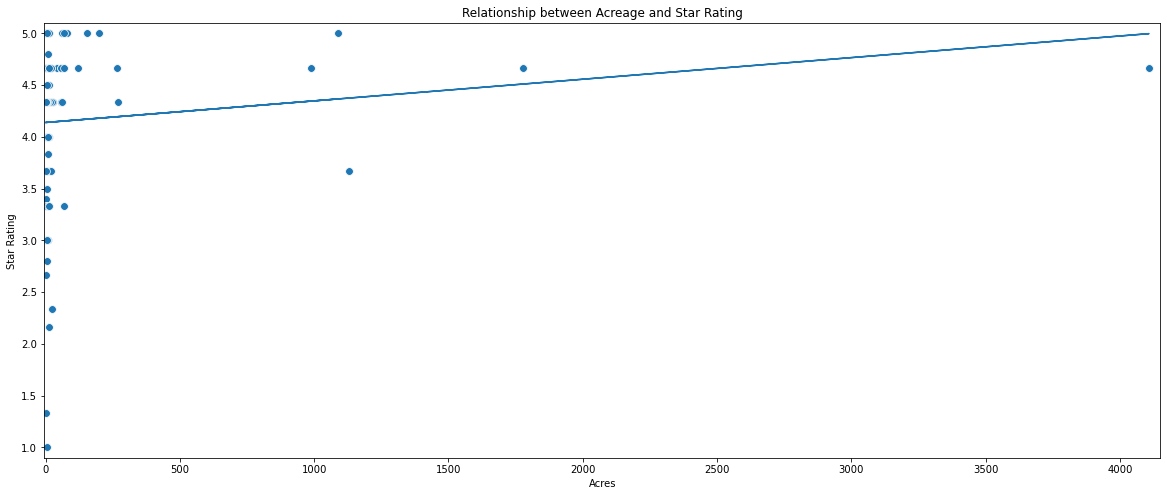

In [45]:
#star ratings graphed against acres visualized in a scatterplot
plot = plt.gcf()
#changing graph size
plot.set_size_inches(20, 8)
#calculating regression line
m, b = np.polyfit(df['acres'], df['rating'], 1)
#creating plot, setting ylim, xlim for optimal visualization
plot_one = sns.scatterplot(x = 'acres', y = 'rating', data = df_grouped, s = 60)
plot_one.set(ylim=(.9,5.1))
plot_one.set(xlim=(-5,4150))
#plotting regression line
plt.plot(df['acres'], m * df['acres'] + b)
#adding title, chaning x-label and y-label for visualization purposes
plt.xlabel('Acres')
plt.ylabel('Star Rating')
plt.title('Relationship between Acreage and Star Rating')

This graph seems to suggest that there is little to no relationship between acreage and star rating. While the regression line seems to suggest that there may be a relationship, this seems swayed by the outlier of ~4100 acres. However, to fully understand this relationship, if it exists, I will create a Linear Regression model to predict star rating from acreage. I will evaluate the results of the OLS model using the commonly used alpha value of .01. I chose to use a Linear Regression model as I want to see if acreage has any effect on star rating.

In [46]:
#creating OLS model predicting star rating from acres
outcome, predictor = patsy.dmatrices('rating ~ acres', df)
model = sm.OLS(outcome, predictor)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     4.139
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0424
Time:                        14:35:52   Log-Likelihood:                -732.53
No. Observations:                 540   AIC:                             1469.
Df Residuals:                     538   BIC:                             1478.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1383      0.042     99.024      0.0

The resulting p-value of this relationship of acres predicting star rating is .042. As .042 > .01 (my alpha value noted above), this result is insignificant. Thus, any sort of relationship that the scatter plot line suggested above seems to be resulting from the outlier swaying the data. Concluding my analysis of the star rating, I will look at the most common words in each positive and negative review over and under the median amount of acres to analyze the specific word meanings.

In [47]:
#grabbing the median amount of acres
median = df['acres'].median()
median

9.735900875

(-0.5, 899.5, 899.5, -0.5)

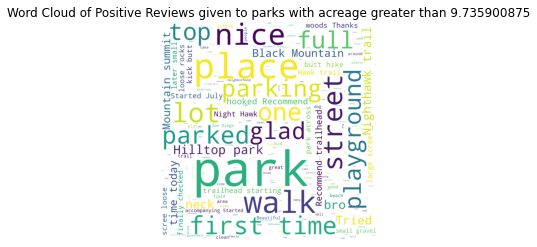

In [48]:
#grouping by pos acerage greater than the median, 9.735900875
df_pos = df[((df['binary rating'] == 'pos') & (df['acres'] >= median))]
df_pos = df_pos[['review']]
#create pos wordcloud
wordcloud_pos = WordCloud(width=900, height=900, random_state=21, max_font_size=200, background_color = 'white').generate(' '.join(df_pos['review']))
plt.imshow(wordcloud_pos)
#adding title to wordcloud, taking off axis for better visualization
plt.title('Word Cloud of Positive Reviews given to parks with acreage greater than 9.735900875')
plt.axis('off')

This word cloud above helps visualize the most common words a reviewer included when reviewing a park over the median amount of acres, and giving it 3 stars or more. These words include "street", "walk", and "playground". I have chosen to ignore the word "park" in this word cloud analysis. This is done because as the proper noun, park, is a blanket term for the thing the user is reviewing, it can be omitted.

(-0.5, 899.5, 899.5, -0.5)

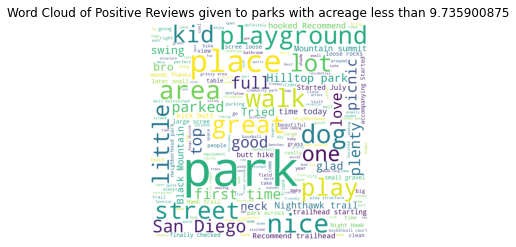

In [49]:
#grouping by pos acerage less than the median, 9.735900875
df_pos = df[((df['binary rating'] == 'pos') & (df['acres'] <= median))]
df_pos = df_pos[['review']]
#create pos wordcloud
wordcloud_pos = WordCloud(width=900, height=900, random_state=21, max_font_size=200, background_color = 'white').generate(' '.join(df_pos['review']))
plt.imshow(wordcloud_pos)
#adding title to wordcloud, taking off axis for better visualization
plt.title('Word Cloud of Positive Reviews given to parks with acreage less than 9.735900875')
plt.axis('off')

This word cloud above helps visualize the most common words a reviewer included when reviewing a park under the median amount of acres, and giving it 3 stars or more. These words include "play", "playground", and "street" again. This is similar to the positive sentiments given by people reviewing a park over the median amount of acres positively. This suggests similar positive sentiments are given by reviewers, regardless of acreage.

(-0.5, 899.5, 899.5, -0.5)

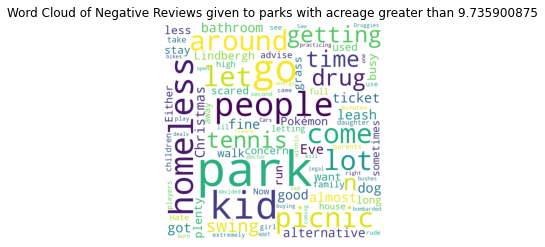

In [50]:
#grouping by neg acerage greater than the median, 9.735900875
df_neg = df[((df['binary rating'] == 'neg') & (df['acres'] >= median))]
df_neg = df_neg[['review']]
#create neg wordcloud
wordcloud_neg = WordCloud(width=900, height=900, random_state=21, max_font_size=200, background_color = 'white').generate(' '.join(df_neg['review']))
plt.imshow(wordcloud_neg)
#adding title to wordcloud, taking off axis for better visualization
plt.title('Word Cloud of Negative Reviews given to parks with acreage greater than 9.735900875')
plt.axis('off')

This word cloud above helps visualize the most common words a reviewer included when reviewing a park over the median amount of acres, and giving it under 3 stars. These words include "homeless", "kid", and "drug".

(-0.5, 899.5, 899.5, -0.5)

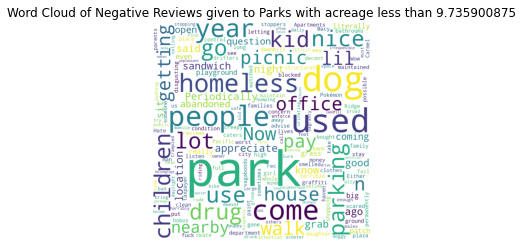

In [51]:
#grouping by neg acerage less than the median, 9.735900875
df_neg = df[((df['binary rating'] == 'neg') & (df['acres'] <= median))]
df_neg = df_neg[['review']]
#create neg wordcloud
wordcloud_neg = WordCloud(width=900, height=900, random_state=21, max_font_size=200, background_color = 'white').generate(' '.join(df_neg['review']))
plt.imshow(wordcloud_neg)
#adding title to wordcloud, taking off axis for better visualization
plt.title('Word Cloud of Negative Reviews given to Parks with acreage less than 9.735900875')
plt.axis('off')

This word cloud visualizes the most common words a reviewer included when reviewing a park under the median acreage, and giving it under 3 stars. These words "homeless", "drug", and "kid", are all similar to the words in the word map above. This suggests again that people dislike similar things in parks over the median amount of acreage and under. This suggests acerage does not seem to play a big part in why people dislike small parks. Another interesting thing to note is "dog". This suggests parks under the median acreage must include dog parks. This may be limiting to the analysis of data, as it focuses on people's enjoyment of parks, not dogs specifically.

# Ethics & Privacy

I cannot ensure that Yelp users would view their reviews being used in this project positively. Although Yelp reviews are publicly available on the internet, I cannot be certain, besides the users agreeing to Yelp's terms and conditions before reviewing, that they would be okay with their reviews being used. However, this ethical concern lies with Yelp, and this project attempts to use their reviews in a non-identifiable way with no huge ethical implications from any results established in this project. However, one might still be able to simply search up the park name in the dataframe, and find the review in the dataframe, and, by looking at that parks yelp page, attach the review to a Yelp user. Thus, this is a huge ethical concern. However, the collector of this dataset attempts to protect user privacy by omitting any username, or any timestamp of when the review was made. This makes the privacy breach harder to attempt by anyone using reviews for unethical purposes.

However, there may be omnipresent bias in Yelp reviews. As the users are reviewing a park, it may be impossible for Yelp to ensure they actually were at that park. Details of how Yelp ensures reviews are truthful are private, and thus bias may be present. As each user contains personal bias, these park reviews may be swayed. This bias can be seen on the word clouds created. People may review parks and have a negative view on things there that others may not. Thus, human bias is omnipresent, and unavoidable. This project attempts to avoid this human bias by viewing the statistics and word clouds as unbiased as possible.

The acres of parks in the San Diego region are publicly available statistics, and thus provide little ethical concern to this project. However, as this data was provided, I cannot fully ensure it was ethically collected. 

The question asked, and analyzed in this project attempts to do so ensuring the privacy of Yelp users by generalizing the findings, and not including any user information.

As with the findings of any project, the author of this paper encourages those viewing to refrain from taking causality from this project. As Yelp is user based, reviews change everyday. Parks are a publicly available feature for the community, and thus change in nature, landscaping, and people in attendance everyday. This everyday change influences constantly changing reviews. Thus, anyone developing conclusions from this paper must view it as a product of its time. 

An unintended consequence may result that parks with large amounts of acreage are deemed unimportant in ensuring the public's happiness. As this project seems to come to no concludable result in that acreage deems higher reviews, this may encourage Parks officials to devalue acreage completely. This is an unavoidable consequence.

# Conclusion & Discussion

In this project, I attempted to discover the relationship between acreage of parks in the San Diego region, and the star rating and sentiment of their Yelp reviews. I hypothesized that due to the media backlash to the new devaluation of acreage in San Diego Parks and Recreation planning, that higher park acreage would correspond to higher yelp reviews. To analyze this, I combined the acreage of each park and it's Yelp text reviews and ratings. I first analyzed the Yelp star rating against acreage. I classified 3 stars and above as a positive review, and 2 stars and below as negative. I conducted a OLS regression model, and found my p-value of acreage predicting star rating as .042, insignificant against my alpha value of .01. I then used word clouds to visualize the most common words for positive and negative reviews above and below the median acreage of the parks. I found users disliked similar things in both low acreage parks, and high acreage parks. In my analysis, I found no evidence that there is any relationship between how many acres a park has and its Yelp rating/review sentiment. I can conclude acreage does not seem to affect Yelp ratings, or sentiment.

This project does suffer from limitations. I noted above an interesting finding that many users mentioned the word "dog" in their negative reviews of low acreage parks. Possibly this meant many low acreage parks were dog parks, which I didn't take into account for this project. Also, there were different amounts of Yelp reviews for different parks. This suffers from a mismatch of data amount for each park, possibly introducing an unavoidable limitation to analyzing this data. Another Yelp limitation was the lack of sizable negative reviews for the parks. However, this was also unavoidable. A final limitation was that there was an outlier of a park with 4100 acres. This may have affected my analysis.

I originally intended to suggest to San Diego Parks and Recreation a data-backed argument that the media is making, that acreage is important for positive public sentiment of parks. However, I cannot do so. I suggest now to the San Diego Parks and Recreation department's 5-year-planning that while this project suggests park acreage is not important data-wise, that the department take into account the public backlash I have collected together, and to continue to edit their new Parks Master Plan for the people it will be benefiting. 